# ECG Classification with Machine Learning and Deep Learning Technics

<div style="text-align: center;">
    <img src="https://i.pinimg.com/1200x/10/39/7f/10397fa0db09eaa1d72969e6e4d9e04b.jpg" width="400">
</div>

**Electrocardiography** is the process of producing an electrocardiogram (ECG or EKG), recordings of heart's electrical activity. ECG classification uses ECG data to identify and categorize various heart conditions, such as arrhythmias and other anomalities. Arrhythmias are abnormal heart rhythms that can be dangerous. It consists of analysing the electrical activity of the heart and detecting some patterns corresponding to specific diseases or conditions. 

ECG heartbeat classification can be used in real-time for arrhythmia detection. By classifying heartbeats in real-time, doctors can monitor patients for arrhythmias and intervene quickly if necessary. For instance, a device worn by a patient could use ECG heartbeat classification to monitor their heart rhythm for signs of arrhythmia. If an arrhythmia is detected, the device could alert the patient or their doctor, and also for driver detection of fatigue using ecg sensor or smartwatch.

We'll use different **machine learning** and **deep learning** technics for detection and classification ECG signal. Moreover, emsemple methods will be used (Model Avaraging, Model Voting). 

Arrhythmia Dataset
*   Number of Samples: 109446
*   Number of Categories: 5
*   Sampling Frequency: 125Hz
*   Data Source: Physionet's MIT-BIH Arrhythmia Dataset
*   Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]


<div style="text-align: center;">
    <img src="https://litfl.com/wp-content/uploads/2018/10/ECG-waves-segments-and-intervals-LITFL-ECG-library-3.jpg" width="600">
    <img src="https://ecgwaves.com/wp-content/uploads/2018/01/ekg-ecg-interpretation-p-qrs-st-t-wave.jpg" width="600">
    <p>ECG intervals are crucial for interpreting an electrocardiogram (ECG), with key intervals including the PR interval, QRS complex, QT interval, and RR interval. These intervals represent the time duration of specific electrical events in the heart, such as atrial and ventricular depolarization and repolarization. Abnormalities in these intervals can indicate various cardiac conditions. </p>
</div>

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Downloading the dataset

In [1]:
import kagglehub

path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alex\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


## Importing the dataset

In [6]:
import os
train_dataset = pd.read_csv(os.path.join(path, 'mitbih_train.csv'), header=None)
test_dataset = pd.read_csv(os.path.join(path, 'mitbih_test.csv'), header=None)

## Exploratory Data Analysis (EDA)

In [7]:
# train dataset
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# test dataset
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
target_column_index = train_dataset.shape[1] - 1
class_labels = train_dataset[target_column_index].unique()

In [10]:
class_names = {
        0: 'Normal Beat',
        1: 'Supraventricular premature beat',
        2: 'Premature ventricular contraction',
        3: 'Fusion of ventricular and normal beat',
        4: 'Unclassifiable beat'
    }

In [11]:
labels = ['Normal Beat', 'Supraventricular premature beat', 'Premature ventricular contraction', 'Fusion of ventricular and normal beat', 'Unclassifiable beat' ]

In [12]:
for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beat
Class label 1.0: Supraventricular premature beat
Class label 2.0: Premature ventricular contraction
Class label 3.0: Fusion of ventricular and normal beat
Class label 4.0: Unclassifiable beat


See if there's missing values in the dataset, by seeing the NaN and average mean but all of the columns have a numbers because its contains of reads in every row at the end of column numbers it captures the electrical activity of your heart over time, ECG datasets are typically large and formatted with multiple leads (channels) capturing electrical activity from different angles of the heart.

In [13]:
# Nan percentages of the columns
null_col = train_dataset.isna().mean() * 100
print(null_col)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
Length: 188, dtype: float64


In [14]:
train_dataset[187] = train_dataset[187].astype(float)
num_of_values = train_dataset[187].value_counts()
print(num_of_values)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [15]:
data_for_plot = pd.DataFrame({'Label': labels, 'Count': num_of_values.values})

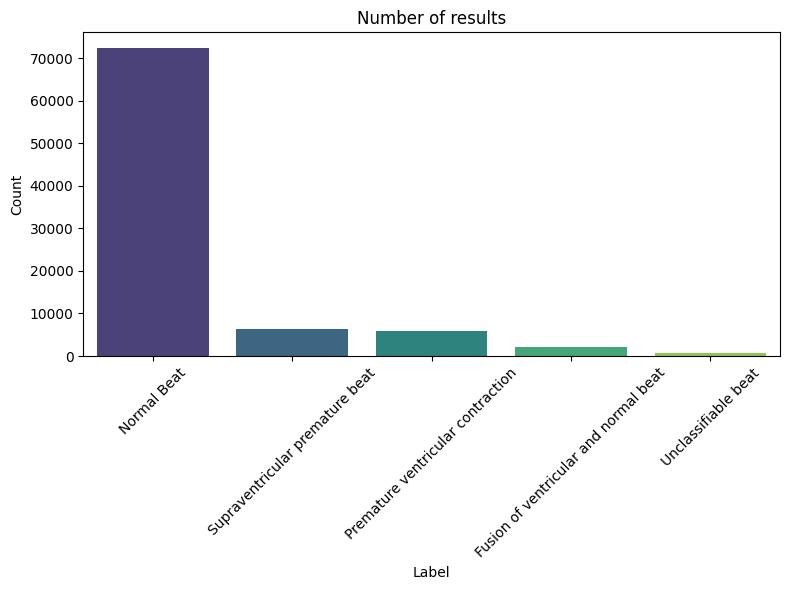

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Number of results")
sns.barplot(data=data_for_plot, x='Label', y='Count', hue='Label', palette='viridis',dodge=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

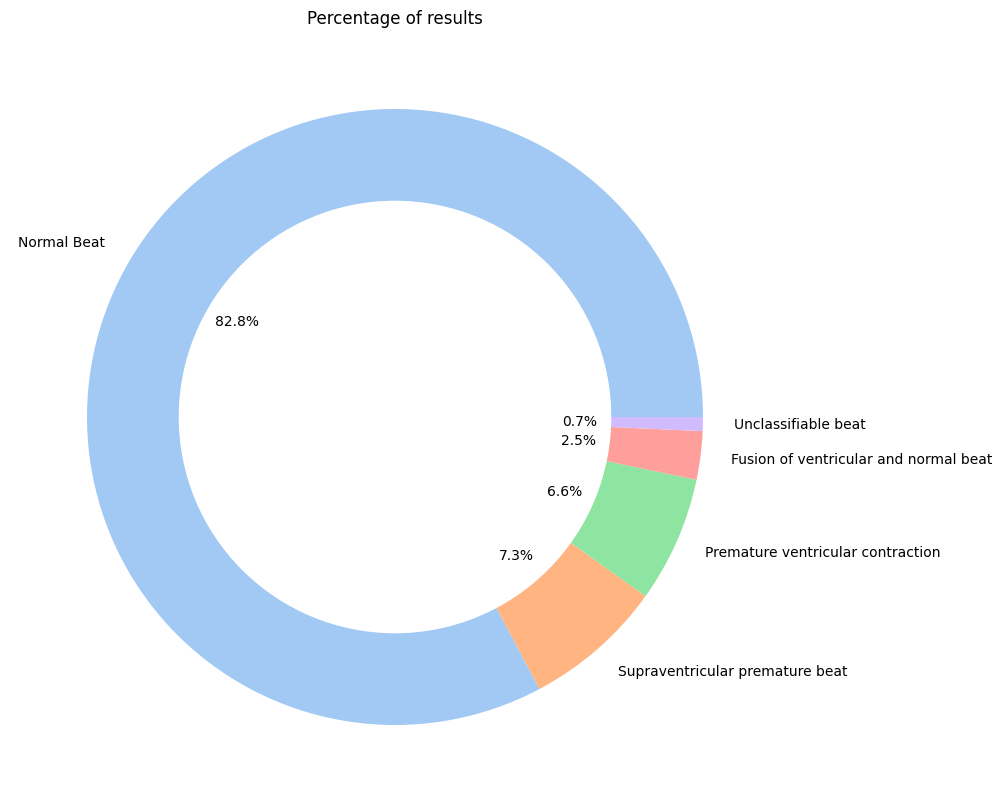

In [18]:
plt.figure(figsize=(20,10))
plt.title("Percentage of results")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(num_of_values.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
test_dataset[187] = test_dataset[187].astype(float)
num_of_values = test_dataset[187].value_counts()
print(num_of_values)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [22]:
train_dataset.shape # 87554 ones, 188 columns

(87554, 188)

In [23]:
test_dataset.shape # 21892 ones, 188 columns

(21892, 188)

It's noticeable that data is slightly inbalanced, the number of the record of normal beats class are bigger than others, it may lead to overfitting and underfitting. So, we'll resample the training data to 20000 samples each class to make it balanced.

In [26]:
df_1 = train_dataset[train_dataset[187] == 1]
df_2 = train_dataset[train_dataset[187] == 2]
df_3 = train_dataset[train_dataset[187] == 3]
df_4 = train_dataset[train_dataset[187] == 4]

In [27]:
from sklearn.utils import resample

In [28]:
df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0 = train_dataset[train_dataset[187]==0].sample(n =20000, random_state=123)
train_dataset = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [30]:
train_dataset.shape # Now we have 20000 samples each class

(100000, 188)

In [31]:
df_1_test = test_dataset[test_dataset[187] == 1]
df_2_test = test_dataset[test_dataset[187] == 2]
df_3_test = test_dataset[test_dataset[187] == 3]
df_4_test = test_dataset[test_dataset[187] == 4]

In [32]:
df_1_upsample_test = resample(df_1, n_samples = 5000, replace = True, random_state = 123)
df_2_upsample_test = resample(df_2, n_samples = 5000, replace = True, random_state = 123)
df_3_upsample_test = resample(df_3, n_samples = 5000, replace = True, random_state = 123)
df_4_upsample_test = resample(df_4, n_samples = 5000, replace = True, random_state = 123)
df_0_test = test_dataset[test_dataset[187]==0].sample(n =5000, random_state=123)
test_dataset = pd.concat([df_0_test, df_1_upsample_test, df_2_upsample_test, df_3_upsample_test, df_4_upsample_test])

In [34]:
test_dataset.shape # In test dataset we have 5000 each class

(25000, 188)

In [35]:
num_of_values = train_dataset[187].value_counts()

In [36]:
data_for_plot = pd.DataFrame({'Label': labels, 'Count': num_of_values.values})

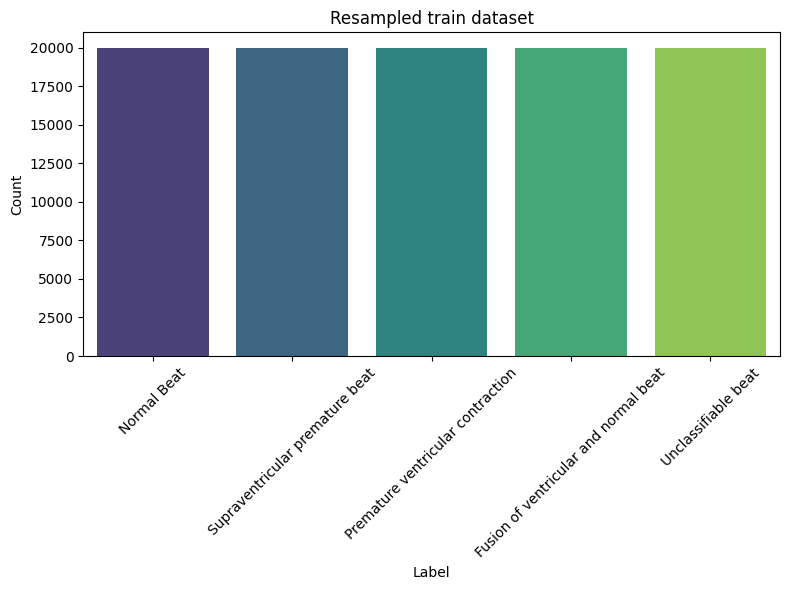

In [38]:
plt.figure(figsize=(8, 6))
plt.title("Resampled train dataset")
sns.barplot(data=data_for_plot, x='Label', y='Count', hue='Label', palette='viridis',dodge=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

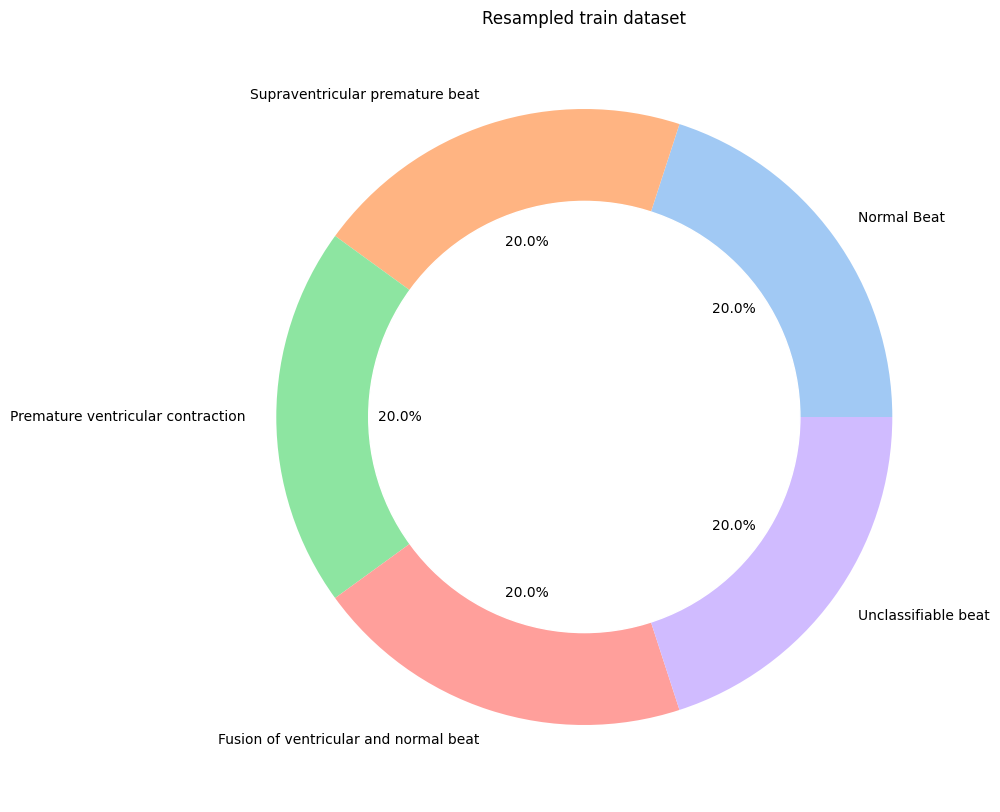

In [39]:
plt.figure(figsize=(20,10))
plt.title("Resampled train dataset")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(num_of_values.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Preprocessing

In [40]:
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [41]:
X_train.shape

(100000, 187)

In [42]:
X_train[:, 5]

array([0.06345733, 0.06761566, 0.16049382, ..., 0.59348035, 0.57711953,
       0.62658226])

In [44]:
X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

Low-Pass Filter: A low-pass filter allows signals below a certain cutoff frequency to pass through unaffected while attenuating frequencies above the cutoff. In the context of ECG signals, it helps remove high-frequency noise while preserving the important low-frequency components related to heart activity.

butter_lowpass_filter Function: This function encapsulates the process of designing and applying the Butterworth low-pass filter. It takes parameters such as the cutoff frequency, sampling rate, and filter order, and returns the filtered signal.***

In [45]:
from scipy.signal import butter, filtfilt

ecg_data = train_dataset
ecg_signal_train = X_train
ecg_signal_test = X_test
class_labels = y_train
sampling_rate = 125 # Sampling Frequency: 125Hz

def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
  """
  order: filter order (5 — smooth transition between passed and suppressed frequencies).
  """
  nyquist_freq = 0.5 * fs
  normal_cutoff = cutoff_freq / nyquist_freq
  b, a = butter(order, normal_cutoff, btype='low', analog=False) # creates Butterworth filter coefficients.
  filtered_data = filtfilt(b, a, data) #  applies a forward and reverse filter — so as not to distort the signal phase (important in ECG!).
  return filtered_data

cutoff_frequency = 50 # Cutoff frequency — anything above 50 Hz will be suppressed (considered noise).
train_filtered_ecg_signal = butter_lowpass_filter(ecg_signal_train, cutoff_frequency, sampling_rate)
test_filtered_ecg_signal = butter_lowpass_filter(ecg_signal_test, cutoff_frequency, sampling_rate)


In [46]:
train_filtered_ecg_signal.shape

(100000, 187)

In [47]:
test_filtered_ecg_signal.shape

(25000, 187)

Indexes: [ 4416 35911 24885 97397  8306]


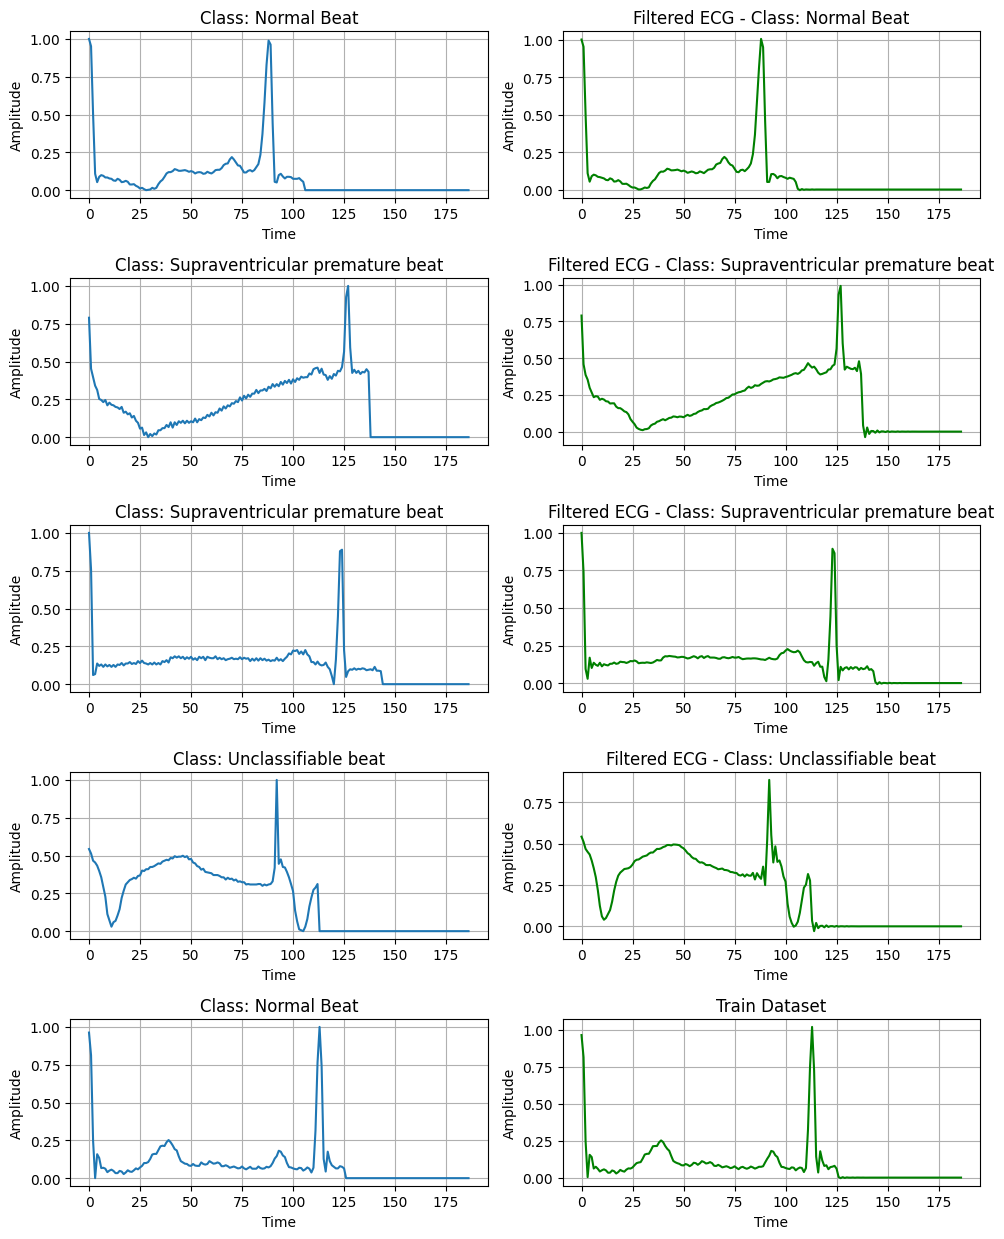

In [48]:
def plot_ecg_examples(raw_data, filtered_data, labels, numOfExamples=5):
  plt.figure(figsize=(10, numOfExamples*2.5))

  indices = np.random.choice(len(raw_data), numOfExamples, replace=False)
  print("Indexes:",indices)
  for i, idx in enumerate(indices):

    # Raw ECG
    plt.subplot(numOfExamples, 2, 2*i+1)
    plt.plot(raw_data[idx])
    plt.title(f'Class: {class_names[labels[idx]]}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Filtered ECG
    plt.subplot(numOfExamples, 2, 2*i + 2)
    plt.plot(filtered_data[idx], color='green')
    plt.title(f'Filtered ECG - Class: {class_names[labels[idx]]}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

  plt.title("Train Dataset")
  plt.tight_layout()
  plt.show()
plot_ecg_examples(X_train, train_filtered_ecg_signal, y_train)


Spliting the training dataset into train, valid for using them in machine and deep learning models, using the test dataset for testing algorithms on new data, using standard scaler function to normalize our training dataset and transform only on valid and test

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(train_filtered_ecg_signal, y_train, test_size=0.2, random_state=42)

In [51]:
X_test = test_filtered_ecg_signal

In [43]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_valid_normalized = scaler.transform(X_valid)
X_test_normalized = scaler.transform(X_test)

print("Before Normalization:")
print(X_train[:, 5])

print("After Normalization:")
print(X_train_normalized[:, 5])

Before Normalization:
[0.13364516 0.27257589 0.49405604 ... 0.19419107 0.17102655 0.13316612]
After Normalization:
[-0.61486297  0.04379548  1.09381347 ... -0.32782007 -0.43764103
 -0.61713402]


In [53]:
print(X_train_normalized.mean(), X_train_normalized.std())

-5.14288552326896e-16 1.0


## Machine Learning Classifiers

### Support Vector Machine (SVM) Model

In [100]:
from sklearn import svm

In [101]:
svm_classifier = svm.SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train_normalized, y_train)

y_pred_valid = svm_classifier.predict(X_valid_normalized)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

y_pred_test = svm_classifier.predict(X_test_normalized)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.94485
Test Accuracy: 0.94528


In [102]:
labels = np.unique(y_test)

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

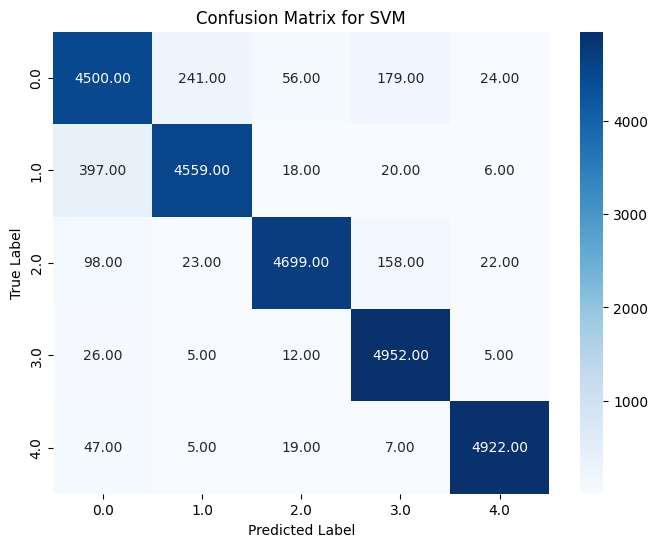

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [105]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


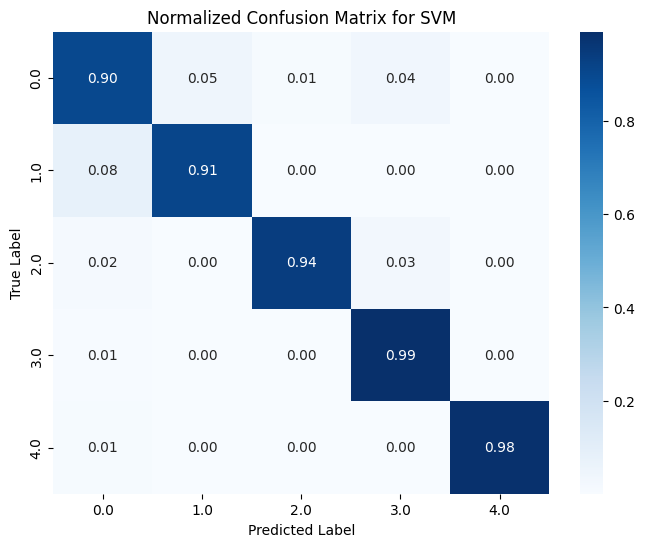

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Normalized Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest (RF) Model

In [107]:
from sklearn.ensemble import RandomForestClassifier

Random forest classifier is a popular machine learning algorithm used for both classification and regression tasks
It's an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [108]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=123)

rf_classifier.fit(X_train_normalized, y_train)

y_pred_valid = rf_classifier.predict(X_valid_normalized)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)


y_pred_test = rf_classifier.predict(X_test_normalized)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.9958
Test Accuracy: 0.99708


In [109]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

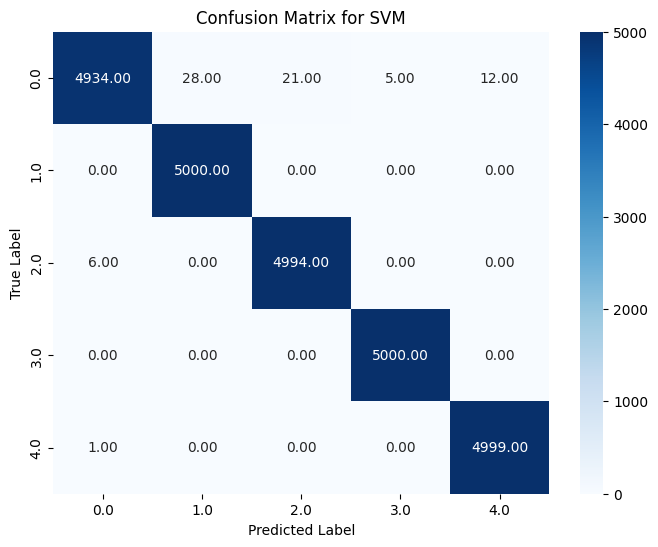

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [111]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


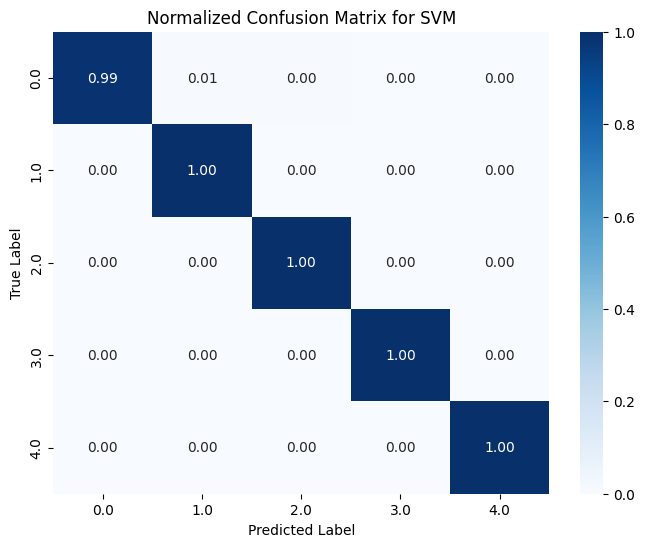

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Normalized Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree (DT) Model

*   Decision trees being one of the most popular and effective techniques used to solve classification problems.
*   It is important to prioritize the features when creating a tree.




In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [115]:
dt_classifier.fit(X_train_normalized, y_train)

y_pred_valid = dt_classifier.predict(X_valid_normalized)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)


y_pred_test = dt_classifier.predict(X_test_normalized)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.983
Test Accuracy: 0.98424


In [116]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

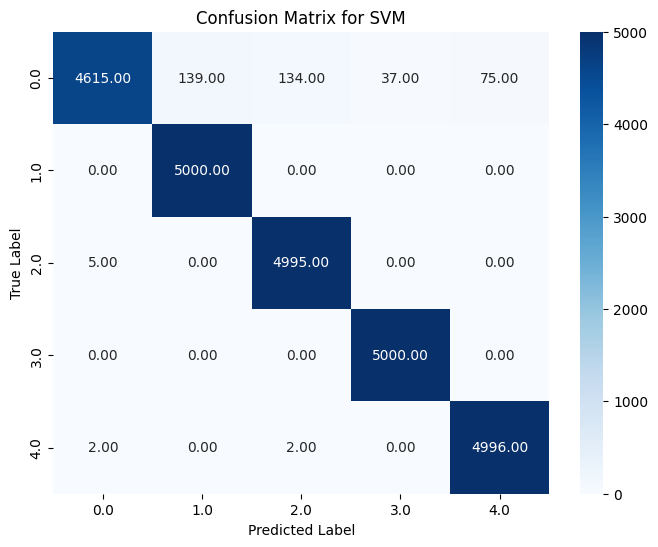

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [118]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


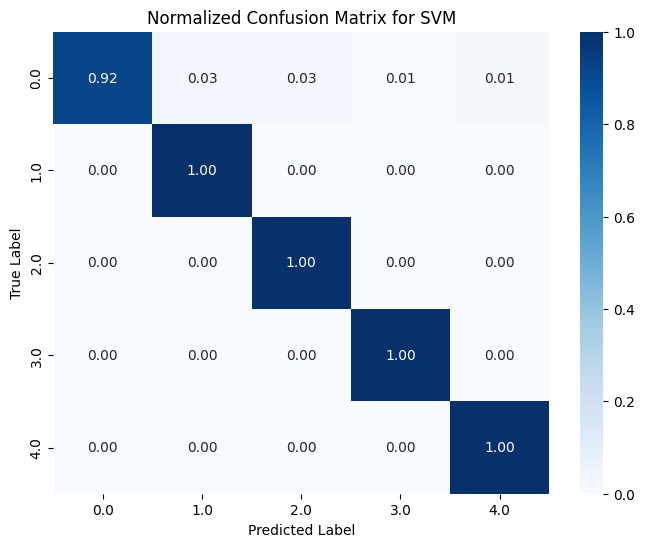

In [119]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Normalized Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Ensemble Model (Voting)

A voting classifier is a machine learning model that combines the predictions of several other individual models, also known as an ensemble method. Instead of relying on a single model, it leverages the strengths of various models to arrive at a more robust prediction.

In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf = VotingClassifier(estimators=[('decision_tree', dt_classifier), ('rf', rf_classifier), ('support_vector_machine', svm_classifier)], voting='hard')


voting_clf.fit(X_train_normalized, y_train)


y_pred_valid = voting_clf.predict(X_valid_normalized)


accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)


y_pred_test = voting_clf.predict(X_test_normalized)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99525
Test Accuracy: 0.99568


In [121]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

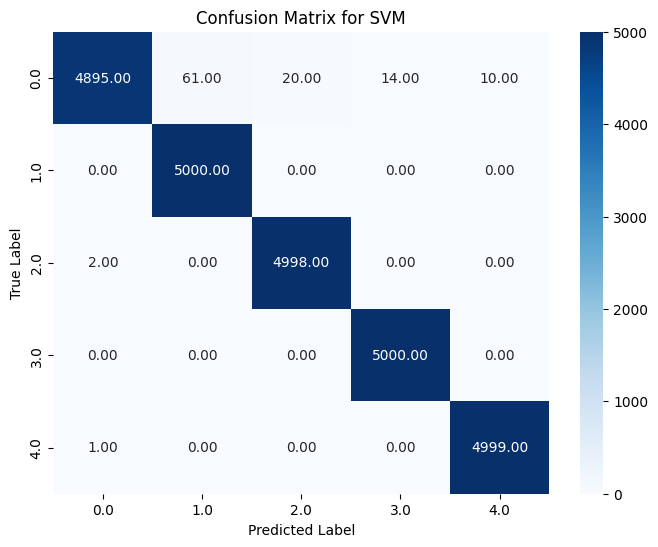

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [123]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


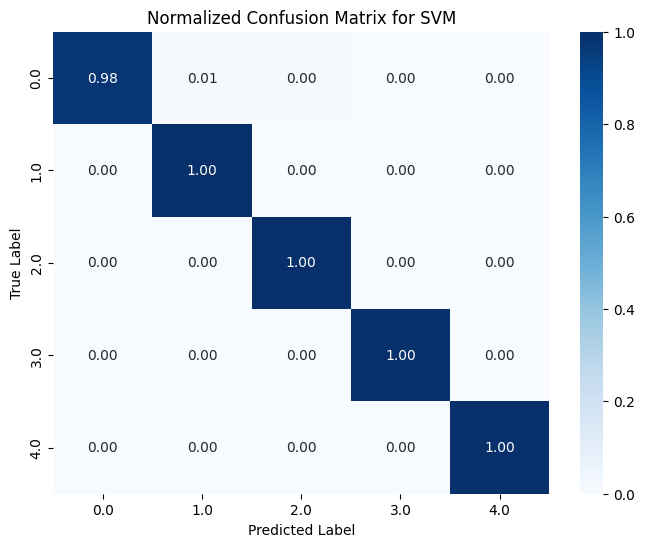

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f'Normalized Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Deep Learning Models

In [51]:
from tensorflow.keras.utils import plot_model

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


### ANN model (FNN)

Feedforward Neural Network, is a fundamental type of artificial neural network architecture characterized by the unidirectional flow of information, which is a basic model that contains an input, optional hidden, and output layers.

We build the model and see its Architicture with an input and only one hidden layer and finally the output layer

In [46]:
X_train_normalized.shape[1]

187

In [47]:
ann_model = Sequential([
    Input(shape=(X_train_normalized.shape[1],)),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(5, activation="softmax")
])

In [48]:
ann_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [49]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               96256     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 361,477
Trainable params: 361,477
Non-trainable params: 0
_________________________________________________________________


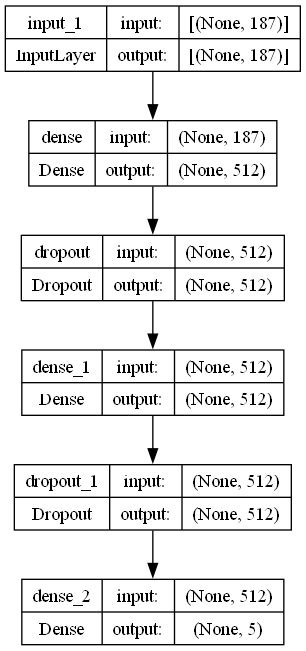

In [53]:
plot_model(ann_model, to_file='Ann_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [65]:
history_ann = ann_model.fit(
    X_train_normalized, y_train,
    validation_data=(X_valid_normalized, y_valid),
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 2s 3ms/step - loss: 0.3707 - accuracy: 0.8636 - val_loss: 0.2122 - val_accuracy: 0.9203
Epoch 2/50
625/625 [==============================] - 1s 2ms/step - loss: 0.2089 - accuracy: 0.9255 - val_loss: 0.1641 - val_accuracy: 0.9398
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.9455 - val_loss: 0.1134 - val_accuracy: 0.9599
Epoch 4/50
625/625 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.9548 - val_loss: 0.1015 - val_accuracy: 0.9670
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9616 - val_loss: 0.0890 - val_accuracy: 0.9693
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9664 - val_loss: 0.0754 - val_accuracy: 0.9750
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9700 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 

Visualize our Training, Valid accuracies and loss



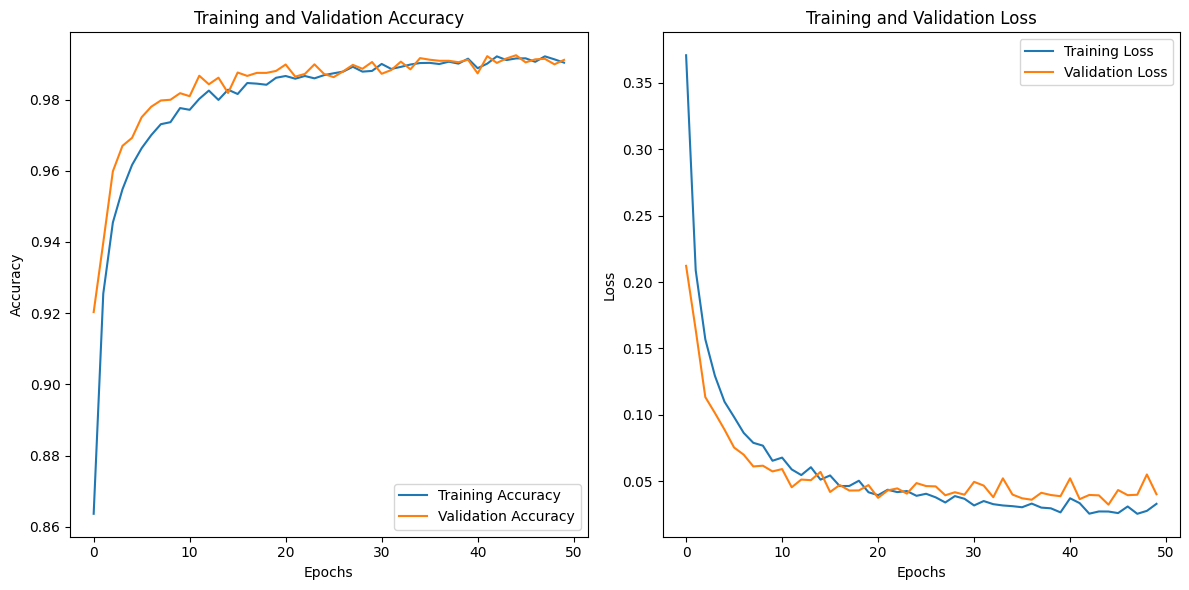

In [66]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
y_pred_test_prob = ann_model.predict(X_test_normalized)

782/782 [==============================] - 1s 864us/step


In [68]:
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

In [69]:
y_pred_valid_prob = ann_model.predict(X_valid_normalized)

625/625 [==============================] - 1s 880us/step


In [70]:
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

In [71]:
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99115
Test Accuracy: 0.99244


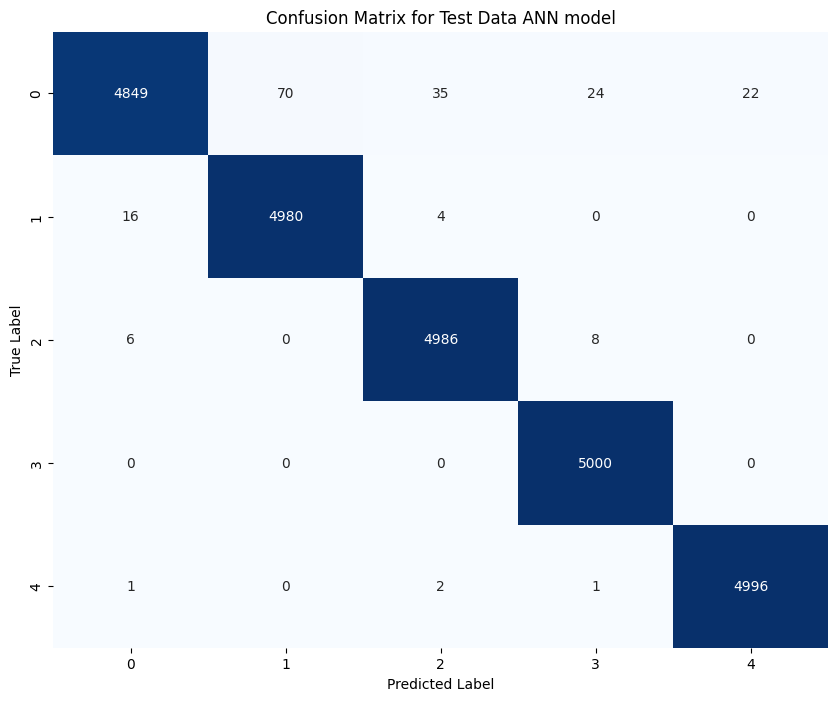

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

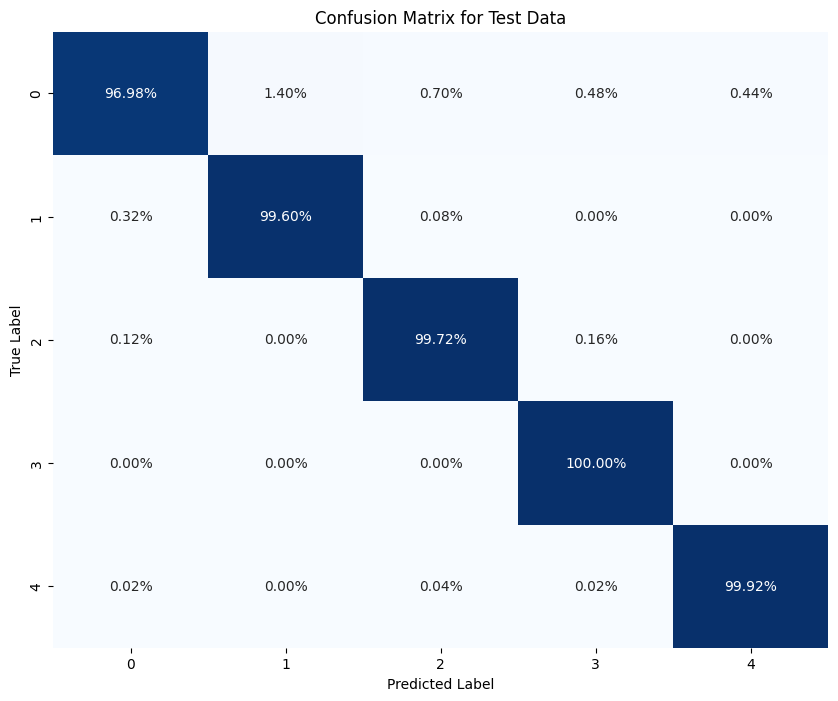

In [73]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5000
         1.0       0.99      1.00      0.99      5000
         2.0       1.00      1.00      1.00      5000
         3.0       0.99      1.00      1.00      5000
         4.0       1.00      1.00      1.00      5000

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000



In [74]:
def evaluate_model(y_test_classes, y_pred_test_classes):
    accuracy = accuracy_score(y_test_classes, y_pred_test_classes)
    precision = precision_score(y_test_classes, y_pred_test_classes, average='micro')
    recall = recall_score(y_test_classes, y_pred_test_classes, average='micro')
    f1 = f1_score(y_test_classes, y_pred_test_classes, average='micro')

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3}")
    print(f"F1-score: {f1:.3f}")



In [75]:
# Example usage:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.992
Precision: 0.992
Recall: 0.992
F1-score: 0.992


Saving the model

In [76]:
ann_model.save("ANN_model.h5")

### Convolutional Neural Network (CNN) Model

In [54]:
cnn_model = Sequential([
    Input(shape=(X_train_normalized.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [55]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 185, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 32)           0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 92, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            6208      
                                                                 
 batch_normalization_1 (Batc  (None, 90, 64)          

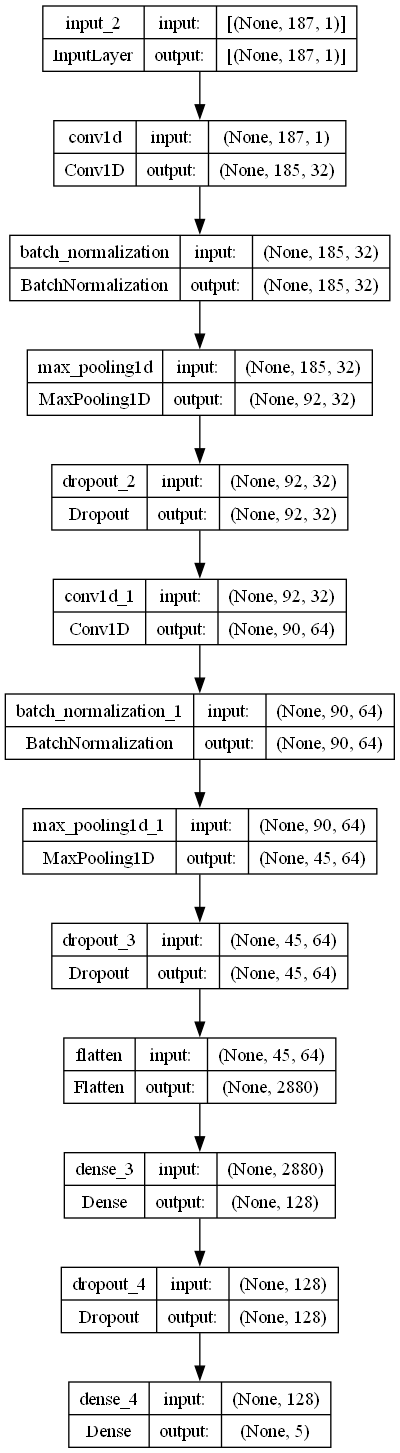

In [57]:
plot_model(cnn_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)


In [81]:
history_cnn = cnn_model.fit(
    X_train_normalized.reshape(-1, X_train_normalized.shape[1], 1),
    y_train,
    validation_data=(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1], 1), y_valid),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3300 - accuracy: 0.8839 - val_loss: 0.1384 - val_accuracy: 0.9517
Epoch 2/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1611 - accuracy: 0.9411 - val_loss: 0.1050 - val_accuracy: 0.9633
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1191 - accuracy: 0.9580 - val_loss: 0.0787 - val_accuracy: 0.9717
Epoch 4/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0973 - accuracy: 0.9658 - val_loss: 0.0751 - val_accuracy: 0.9754
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0832 - accuracy: 0.9708 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0654 - accuracy: 0.9772 - val_loss: 0.0494 - val_accuracy:

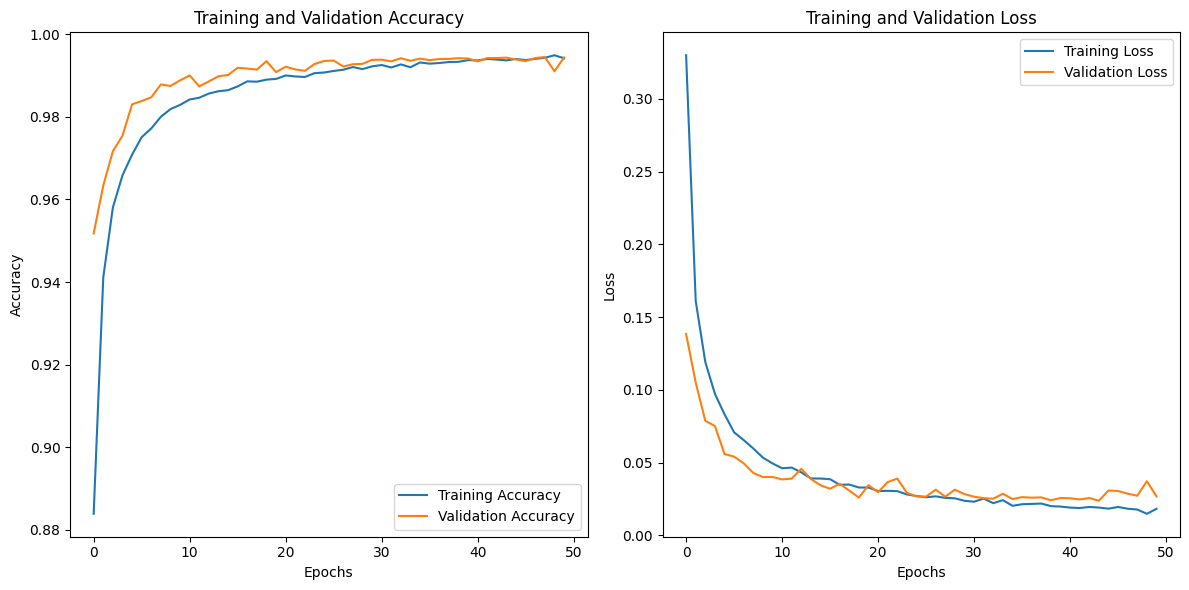

In [82]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [83]:
y_pred_test_prob = cnn_model.predict(X_test_normalized.reshape(-1, X_test_normalized.shape[1], 1))

782/782 [==============================] - 2s 1ms/step


In [84]:
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

In [85]:
y_pred_valid_prob = cnn_model.predict(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1], 1))
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

625/625 [==============================] - 1s 1ms/step


In [86]:
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.99435
Test Accuracy: 0.9954


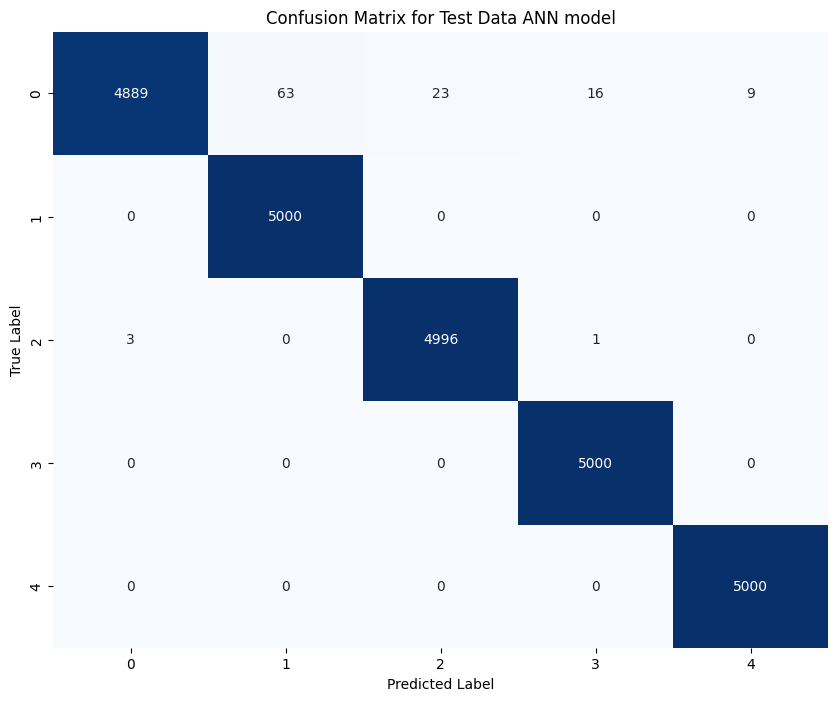

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

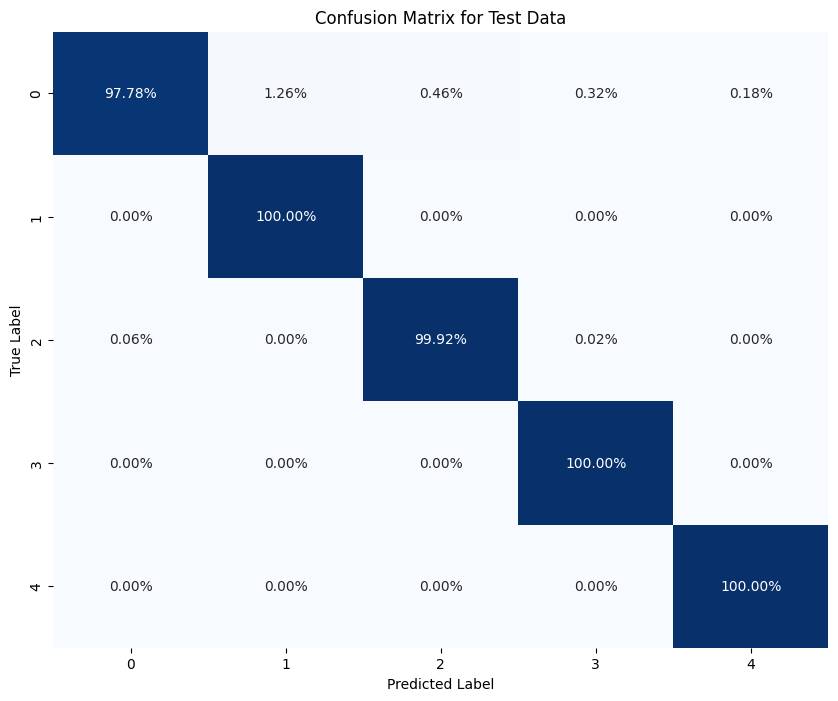

In [88]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5000
         1.0       0.99      1.00      0.99      5000
         2.0       1.00      1.00      1.00      5000
         3.0       1.00      1.00      1.00      5000
         4.0       1.00      1.00      1.00      5000

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [90]:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.995
Precision: 0.995
Recall: 0.995
F1-score: 0.995


In [91]:
cnn_model.save("CNN_model.h5")

### Long Short-Term Memory (LSTM) Model

An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory. RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.

In [58]:
lstm_model = Sequential([
    Input(shape=(X_train_normalized.shape[1], 1)),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [59]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 187, 64)           16896     
                                                                 
 dropout_5 (Dropout)         (None, 187, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                

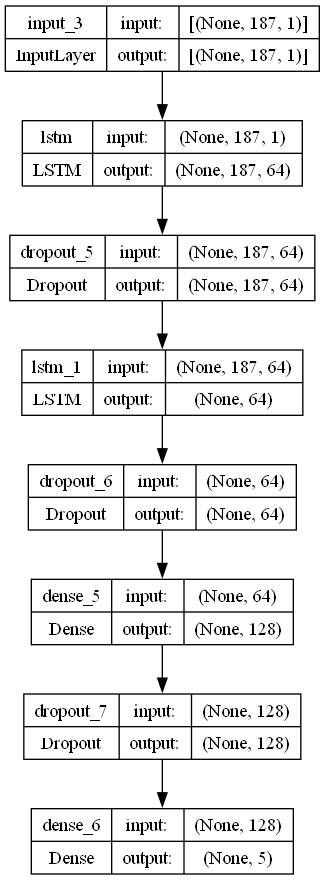

In [61]:
plot_model(lstm_model, to_file='RNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)


In [57]:
history_rnn = lstm_model.fit(
    X_train_normalized.reshape(-1, X_train_normalized.shape[1],1),
    y_train,
    validation_data=(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1],1), y_valid),
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 22s 31ms/step - loss: 1.1982 - accuracy: 0.5083 - val_loss: 1.0512 - val_accuracy: 0.5768
Epoch 2/50
625/625 [==============================] - 20s 31ms/step - loss: 1.0283 - accuracy: 0.6054 - val_loss: 0.9816 - val_accuracy: 0.6217
Epoch 3/50
625/625 [==============================] - 20s 31ms/step - loss: 0.9697 - accuracy: 0.6353 - val_loss: 1.1726 - val_accuracy: 0.5465
Epoch 4/50
625/625 [==============================] - 19s 31ms/step - loss: 0.9927 - accuracy: 0.6288 - val_loss: 0.8980 - val_accuracy: 0.6718
Epoch 5/50
625/625 [==============================] - 19s 31ms/step - loss: 1.0333 - accuracy: 0.6086 - val_loss: 1.1585 - val_accuracy: 0.5372
Epoch 6/50
625/625 [==============================] - 20s 32ms/step - loss: 1.0623 - accuracy: 0.5771 - val_loss: 0.9581 - val_accuracy: 0.6275
Epoch 7/50
625/625 [==============================] - 19s 30ms/step - loss: 0.9545 - accuracy: 0.6413 - val_loss: 0.8811 - val_accuracy:

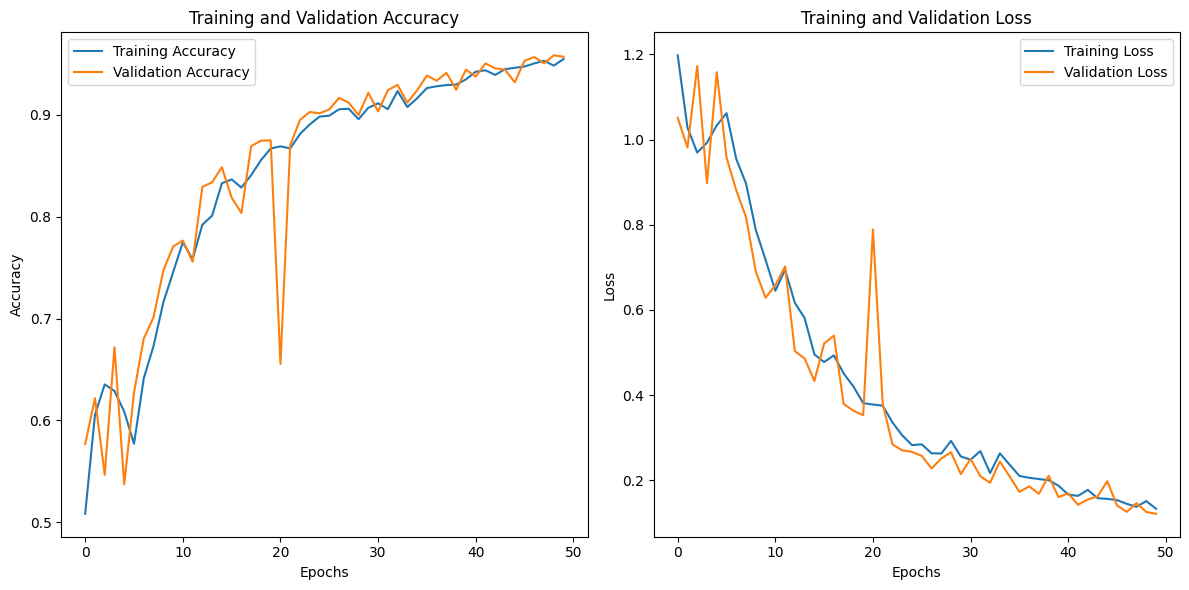

In [59]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [92]:
y_pred_test_prob = lstm_model.predict(X_test_normalized.reshape(-1, X_test_normalized.shape[1], 1))

782/782 [==============================] - 8s 10ms/step


In [93]:
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

In [94]:
y_pred_valid_prob = lstm_model.predict(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1], 1))
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

625/625 [==============================] - 6s 9ms/step


In [95]:
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.95685
Test Accuracy: 0.95848


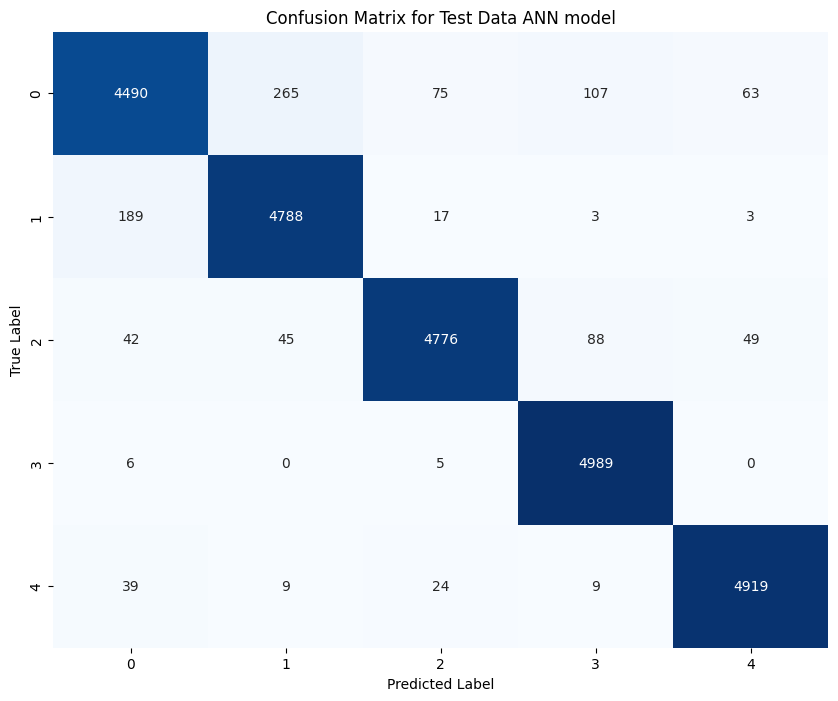

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

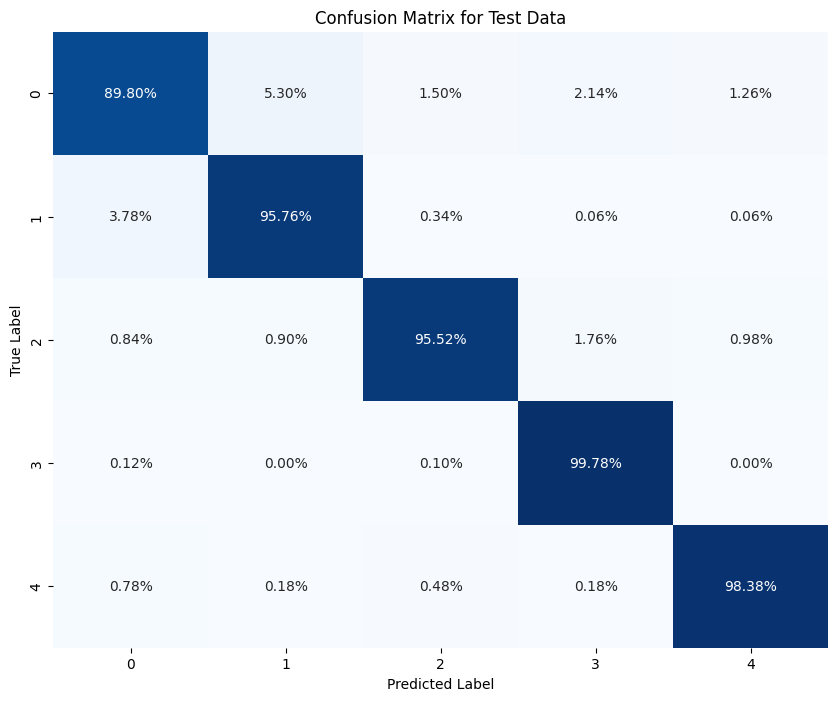

In [97]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [98]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      5000
         1.0       0.94      0.96      0.95      5000
         2.0       0.98      0.96      0.97      5000
         3.0       0.96      1.00      0.98      5000
         4.0       0.98      0.98      0.98      5000

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



In [99]:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.958
Precision: 0.958
Recall: 0.958
F1-score: 0.958


Model Saving

In [58]:
lstm_model.save("RNN_model.h5")

## Model loading

In [62]:
ann_model = tf.keras.models.load_model("ANN_model.h5")

In [63]:
cnn_model = tf.keras.models.load_model("CNN_model.h5")

In [64]:
rnn_model = tf.keras.models.load_model("RNN_model.h5")

## Ensemble (Model Averaging)

Model averaging: This involves training multiple deep learning models with different architectures or initializations and averaging their predictions. This can help reduce overfitting and improve generalization.

In [65]:
ann_probs = ann_model.predict(X_test_normalized)

782/782 [==============================] - 1s 1ms/step


In [67]:
cnn_probs = cnn_model.predict(X_test_normalized.reshape(-1, 187, 1))

782/782 [==============================] - 2s 2ms/step


In [73]:
rnn_probs = lstm_model.predict(X_test_normalized.reshape(-1, X_test_normalized.shape[1], 1))

782/782 [==============================] - 8s 10ms/step


In [74]:
ensemble_probs = (ann_probs + cnn_probs + rnn_probs) / 3

In [75]:
ensemble_preds = np.argmax(ensemble_probs, axis=1)

In [76]:
ensemble_accuracy = np.mean(ensemble_preds == y_test)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.99552


## Ensemble (Model Voting)

Voting: In this approach, each base model gets a single vote, and the final prediction is made based on a majority vote (for classification tasks) or averaging (for regression tasks) of the individual predictions

In [78]:
ann_probs_vot = ann_model.predict(X_test_normalized)
cnn_probs_vot = cnn_model.predict(X_test_normalized.reshape(-1, 187, 1))
rnn_probs_vot = rnn_model.predict(X_test_normalized.reshape(-1, 187, 1))

782/782 [==============================] - 8s 10ms/step


In [79]:
ann_preds = np.argmax(ann_probs_vot, axis=1)
cnn_preds = np.argmax(cnn_probs_vot, axis=1)
rnn_preds = np.argmax(rnn_probs_vot, axis=1)

In [80]:
ensemble_preds = []

In [82]:
for i in range(len(X_test_normalized)):
    votes = [ann_preds[i], cnn_preds[i], rnn_preds[i]]
    ensemble_pred = max(set(votes), key=votes.count)
    ensemble_preds.append(ensemble_pred)

ensemble_preds = np.array(ensemble_preds)
ensemble_accuracy = np.mean(ensemble_preds == y_test)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.995
